### Build a model to predict students' exam scores based on their study hours
#### Perform data cleaning and basic visualization to understand the dataset
#### Split the dataset into training and testing sets
#### Train a linear regression model to estimate final scores
#### Visualize predictions and evaluate model performance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)



In [51]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [53]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [54]:
df.duplicated().sum()

0

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [56]:
# Check the unique values in categorical columns with missing data
print("Teacher_Quality unique values:", df['Teacher_Quality'].unique())
print("Parental_Education_Level unique values:", df['Parental_Education_Level'].unique())
print("Distance_from_Home unique values:", df['Distance_from_Home'].unique())

Teacher_Quality unique values: ['Medium' 'High' 'Low' nan]
Parental_Education_Level unique values: ['High School' 'College' 'Postgraduate' nan]
Distance_from_Home unique values: ['Near' 'Moderate' 'Far' nan]


In [57]:
# Use mode imputation for categorical variables
categorical_imputer = SimpleImputer(strategy='most_frequent')

df['Teacher_Quality'] = categorical_imputer.fit_transform(df[['Teacher_Quality']]).ravel()
df['Parental_Education_Level'] = categorical_imputer.fit_transform(df[['Parental_Education_Level']]).ravel()
df['Distance_from_Home'] = categorical_imputer.fit_transform(df[['Distance_from_Home']]).ravel()

In [58]:
# Verify no missing values remain
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


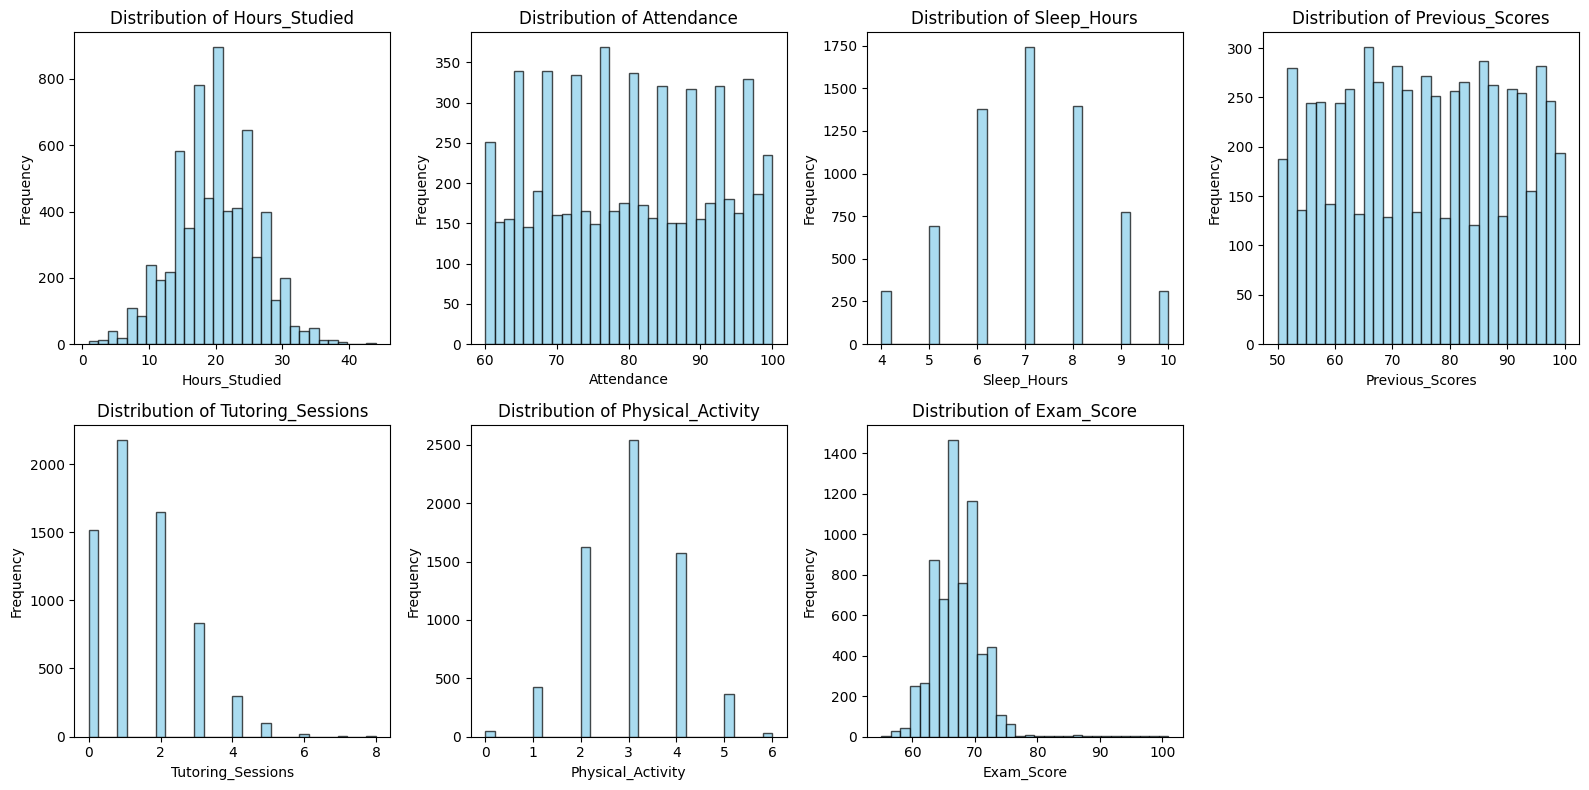

In [59]:
# --- Visualize numeric feature distributions ---
numeric_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours',
                'Previous_Scores', 'Tutoring_Sessions',
                'Physical_Activity', 'Exam_Score']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide empty subplot
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

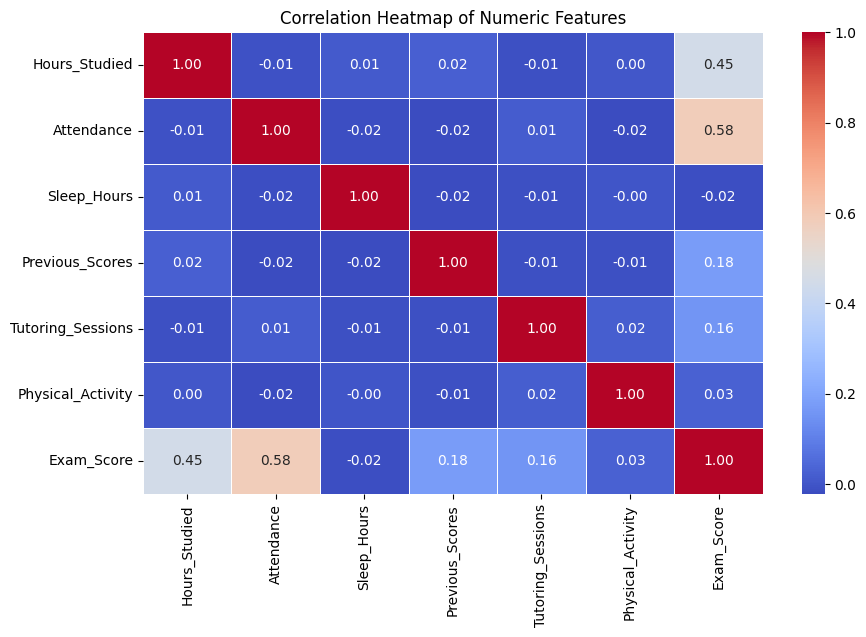

In [60]:
# --- Correlation heatmap for numeric features ---
numeric_df = df[numeric_cols]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

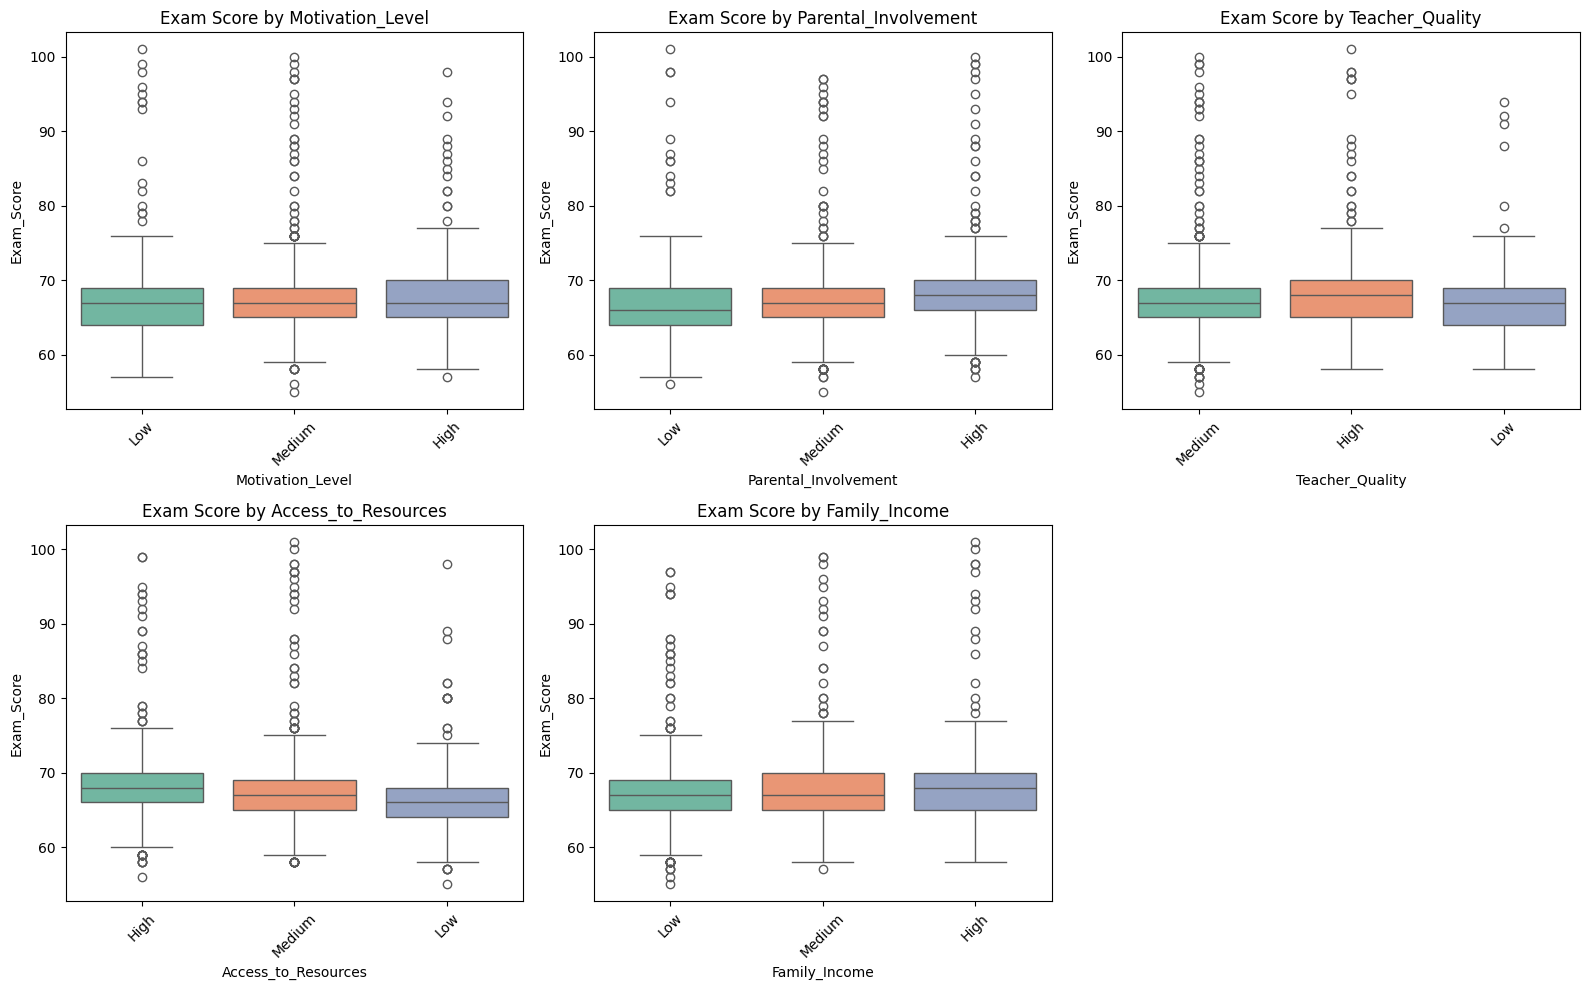

In [61]:
# --- Boxplot: Exam Score vs. Categorical Variables (Top 5) ---
top_cats = ['Motivation_Level', 'Parental_Involvement', 'Teacher_Quality',
            'Access_to_Resources', 'Family_Income']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for i, col in enumerate(top_cats):
    sns.boxplot(x=col, y='Exam_Score', data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Exam Score by {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide empty subplot
axes[-1].axis('off')
plt.tight_layout()
plt.show()

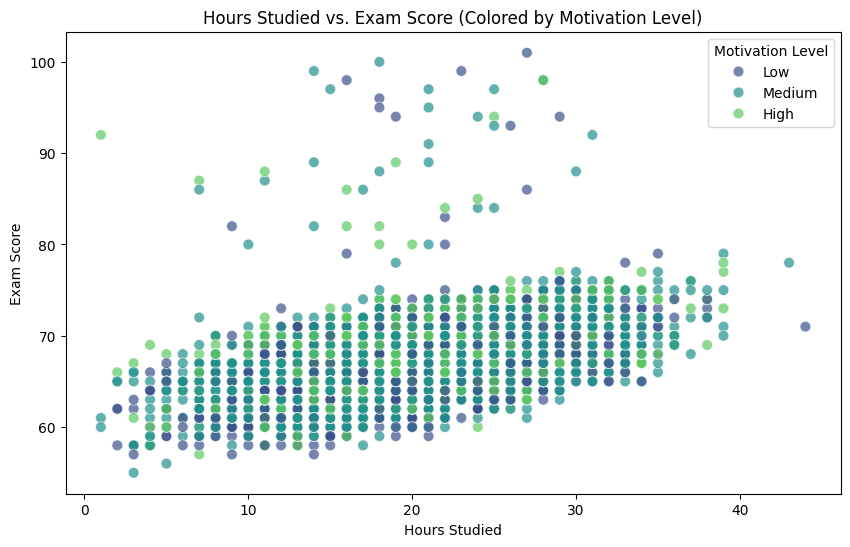

In [62]:
# --- Scatter plot: Hours Studied vs. Exam Score (colored by Motivation) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', hue='Motivation_Level',
                data=df, palette='viridis', alpha=0.7, s=60)
plt.title('Hours Studied vs. Exam Score (Colored by Motivation Level)')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend(title='Motivation Level')
plt.show()

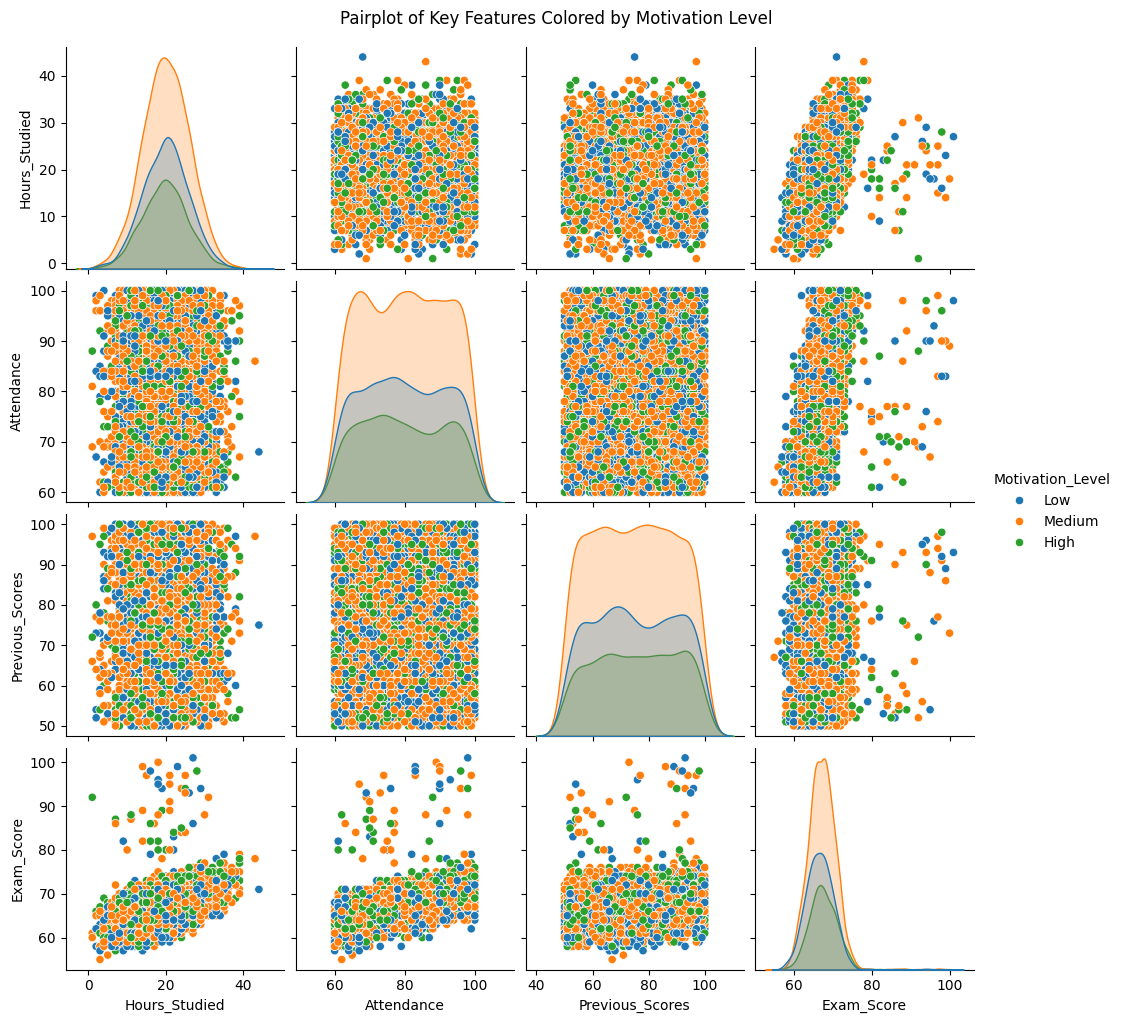

In [63]:
# --- Pairplot for top numeric features vs. Exam Score ---
sns.pairplot(df[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score', 'Motivation_Level']],
             hue='Motivation_Level', palette='tab10', diag_kind='kde')
plt.suptitle('Pairplot of Key Features Colored by Motivation Level', y=1.02)
plt.show()

## Key Insights from Visualizations (Summary):
Exam Score Distribution: Slightly right-skewed, with most scores between 65–70.

### Strong Correlations:

Previous_Scores and Exam_Score are highly correlated.

Hours_Studied and Exam_Score show moderate positive correlation.

### Categorical Influence:

Higher Motivation_Level and Parental_Involvement are associated with higher exam scores.

Access_to_Resources and Teacher_Quality also show score differences across levels.

Outliers: Some extreme values in Hours_Studied and Exam_Score (e.g., 101 score) may need further checking

In [ ]:
# ============================================================================
# 1. SPLIT THE DATASET INTO TRAINING AND TESTING SETS
# ============================================================================

X = df[['Hours_Studied']]  # Feature
y = df['Exam_Score']       # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Feature shape: {X_train.shape[1]} feature(s)")

Training set size: 5285 samples
Testing set size: 1322 samples
Feature shape: 1 feature(s)


In [65]:
# ============================================================================
# 2. TRAIN A LINEAR REGRESSION MODEL
# ============================================================================

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Get model coefficients
print("Linear Regression Model Results:")
print(f"Coefficient (slope): {lr_model.coef_[0]:.4f}")
print(f"Intercept: {lr_model.intercept_:.4f}")
print(f"Equation: Exam_Score = {lr_model.intercept_:.4f} + {lr_model.coef_[0]:.4f} * Hours_Studied")

Linear Regression Model Results:
Coefficient (slope): 0.2857
Intercept: 61.5112
Equation: Exam_Score = 61.5112 + 0.2857 * Hours_Studied


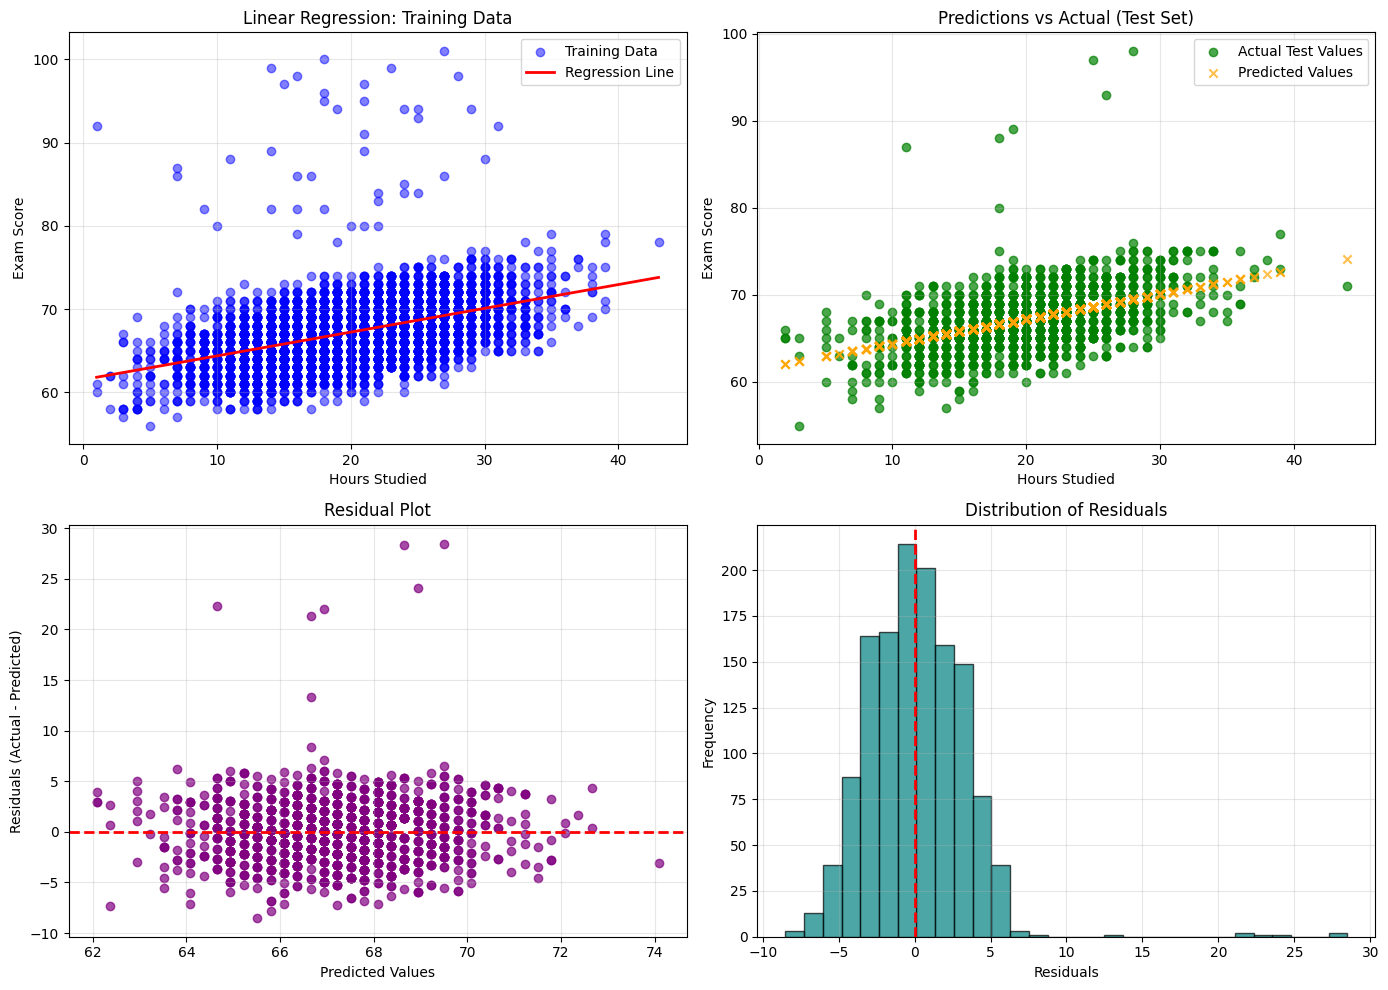


MODEL EVALUATION METRICS
Mean Squared Error (MSE): 10.8559
Root Mean Squared Error (RMSE): 3.2948
Mean Absolute Error (MAE): 2.4476
R-squared Score: 0.2320


In [66]:
# ============================================================================
# 3. VISUALIZE PREDICTIONS AND EVALUATE MODEL PERFORMANCE
# ============================================================================

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Regression Line with Training Data
axes[0, 0].scatter(X_train, y_train, alpha=0.5, label='Training Data', color='blue')
# Generate line for regression
x_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
y_line = lr_model.predict(x_line)
axes[0, 0].plot(x_line, y_line, color='red', linewidth=2, label='Regression Line')
axes[0, 0].set_xlabel('Hours Studied')
axes[0, 0].set_ylabel('Exam Score')
axes[0, 0].set_title('Linear Regression: Training Data')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Predictions vs Actual Values
axes[0, 1].scatter(X_test, y_test, alpha=0.7, label='Actual Test Values', color='green')
axes[0, 1].scatter(X_test, y_pred_lr, alpha=0.7, label='Predicted Values', color='orange', marker='x')
axes[0, 1].set_xlabel('Hours Studied')
axes[0, 1].set_ylabel('Exam Score')
axes[0, 1].set_title('Predictions vs Actual (Test Set)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residuals
residuals = y_test - y_pred_lr
axes[1, 0].scatter(y_pred_lr, residuals, alpha=0.7, color='purple')
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals (Actual - Predicted)')
axes[1, 0].set_title('Residual Plot')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Distribution of Residuals
axes[1, 1].hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='teal')
axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Residuals')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("\n" + "="*50)
print("MODEL EVALUATION METRICS")
print("="*50)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")


POLYNOMIAL REGRESSION COMPARISON


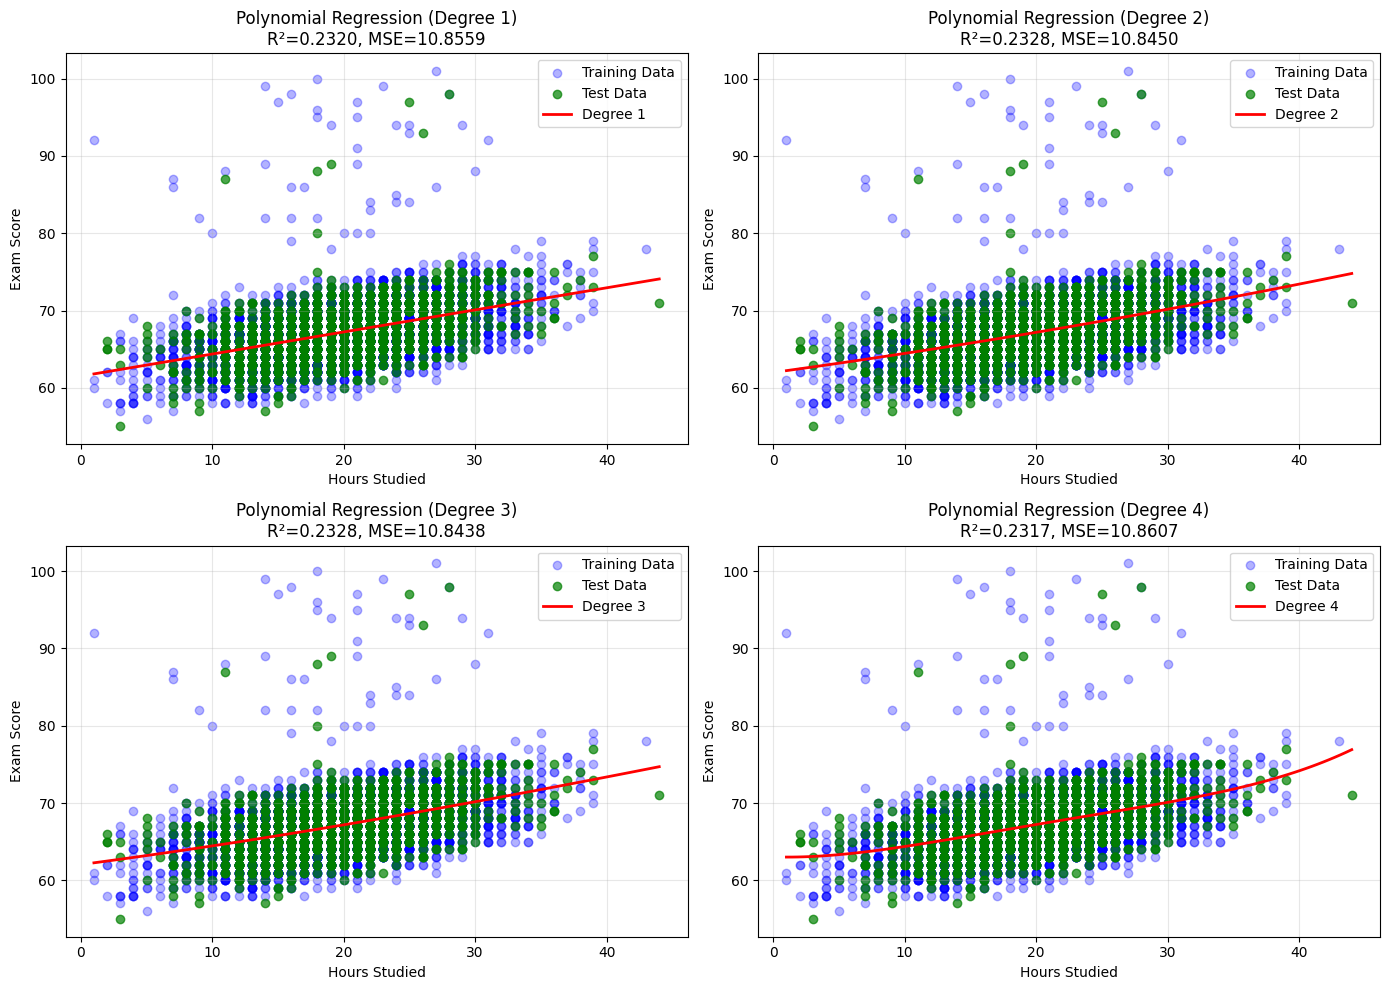


Comparison of Different Polynomial Degrees:
--------------------------------------------------
Degree 1: R² = 0.2320, MSE = 10.8559
Degree 2: R² = 0.2328, MSE = 10.8450
Degree 3: R² = 0.2328, MSE = 10.8438
Degree 4: R² = 0.2317, MSE = 10.8607


In [67]:
# ============================================================================
# BONUS 1: POLYNOMIAL REGRESSION
# ============================================================================

# Try different polynomial degrees
degrees = [1, 2, 3, 4]
poly_results = []

print("\n" + "="*50)
print("POLYNOMIAL REGRESSION COMPARISON")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, degree in enumerate(degrees):
    # Create polynomial features pipeline
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X_train, y_train)

    # Make predictions
    y_pred_poly = poly_model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred_poly)
    r2 = r2_score(y_test, y_pred_poly)

    poly_results.append({
        'degree': degree,
        'model': poly_model,
        'mse': mse,
        'r2': r2
    })

    # Plot results
    axes[i].scatter(X_train, y_train, alpha=0.3, label='Training Data', color='blue')
    axes[i].scatter(X_test, y_test, alpha=0.7, label='Test Data', color='green')

    # Generate smooth curve for visualization
    x_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_plot = poly_model.predict(x_plot)
    axes[i].plot(x_plot, y_plot, color='red', linewidth=2, label=f'Degree {degree}')

    axes[i].set_xlabel('Hours Studied')
    axes[i].set_ylabel('Exam Score')
    axes[i].set_title(f'Polynomial Regression (Degree {degree})\nR²={r2:.4f}, MSE={mse:.4f}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare polynomial results
print("\nComparison of Different Polynomial Degrees:")
print("-"*50)
for result in poly_results:
    print(f"Degree {result['degree']}: R² = {result['r2']:.4f}, MSE = {result['mse']:.4f}")


FEATURE COMBINATION EXPERIMENTS

Only Hours:
  Features: Hours_Studied
  R² Score: 0.2320
  MSE: 10.8559

Hours + Previous Score:
  Features: Hours_Studied, Previous_Scores
  R² Score: 0.2541
  MSE: 10.5438
  Hours_Studied: coefficient = 0.2843
  Previous_Scores: coefficient = 0.0456

Hours + Attendance:
  Features: Hours_Studied, Attendance
  R² Score: 0.5890
  MSE: 5.8091
  Hours_Studied: coefficient = 0.2889
  Attendance: coefficient = 0.1984

Hours + Sleep:
  Features: Hours_Studied, Sleep_Hours
  R² Score: 0.2290
  MSE: 10.8983
  Hours_Studied: coefficient = 0.2862
  Sleep_Hours: coefficient = -0.0896

Academic Features:
  Features: Hours_Studied, Previous_Scores, Attendance, Tutoring_Sessions
  R² Score: 0.6414
  MSE: 5.0694
  Hours_Studied: coefficient = 0.2894
  Previous_Scores: coefficient = 0.0482
  Attendance: coefficient = 0.1985
  Tutoring_Sessions: coefficient = 0.5115

Lifestyle Features:
  Features: Hours_Studied, Sleep_Hours, Physical_Activity
  R² Score: 0.2286
  MSE

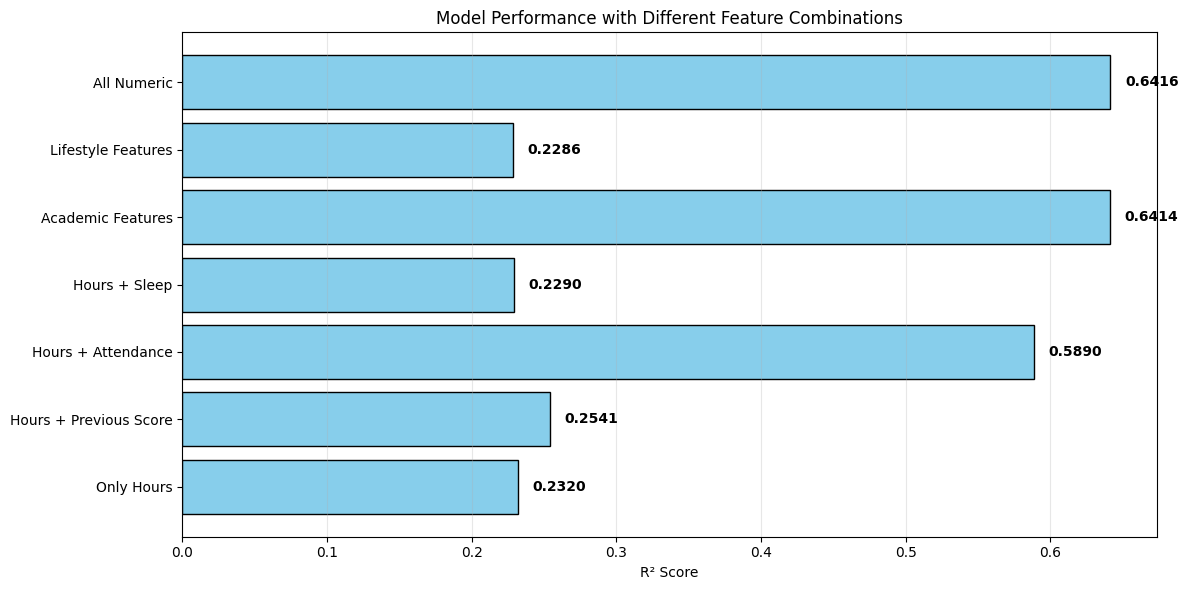


BEST FEATURE COMBINATION: All Numeric
R² Score: 0.6416
Features: Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity


In [ ]:
# ============================================================================
# BONUS 2: EXPERIMENT WITH DIFFERENT FEATURE COMBINATIONS
# ============================================================================

# Define different feature combinations
feature_sets = {
    'Only Hours': ['Hours_Studied'],
    'Hours + Previous Score': ['Hours_Studied', 'Previous_Scores'],
    'Hours + Attendance': ['Hours_Studied', 'Attendance'],
    'Hours + Sleep': ['Hours_Studied', 'Sleep_Hours'],
    'Academic Features': ['Hours_Studied', 'Previous_Scores', 'Attendance', 'Tutoring_Sessions'],
    'Lifestyle Features': ['Hours_Studied', 'Sleep_Hours', 'Physical_Activity'],
    'All Numeric': ['Hours_Studied', 'Attendance', 'Sleep_Hours',
                    'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
}

# Test each feature combination
feature_results = []

print("\n" + "="*60)
print("FEATURE COMBINATION EXPERIMENTS")
print("="*60)

for name, features in feature_sets.items():
    X_multi = df[features]

    # Split data
    X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
        X_multi, y, test_size=0.2, random_state=42
    )

    # Train model
    model = LinearRegression()
    model.fit(X_train_m, y_train_m)

    # Make predictions
    y_pred_m = model.predict(X_test_m)

    # Calculate metrics
    mse = mean_squared_error(y_test_m, y_pred_m)
    r2 = r2_score(y_test_m, y_pred_m)

    feature_results.append({
        'name': name,
        'features': features,
        'model': model,
        'mse': mse,
        'r2': r2,
        'coefficients': model.coef_ if len(features) > 1 else model.coef_[0]
    })

    print(f"\n{name}:")
    print(f"  Features: {', '.join(features)}")
    print(f"  R² Score: {r2:.4f}")
    print(f"  MSE: {mse:.4f}")
    if len(features) > 1:
        for feat, coef in zip(features, model.coef_):
            print(f"  {feat}: coefficient = {coef:.4f}")

# Visualize comparison of feature combinations
fig, ax = plt.subplots(figsize=(12, 6))

names = [result['name'] for result in feature_results]
r2_scores = [result['r2'] for result in feature_results]

bars = ax.barh(names, r2_scores, color='skyblue', edgecolor='black')
ax.set_xlabel('R² Score')
ax.set_title('Model Performance with Different Feature Combinations')
ax.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for bar, r2 in zip(bars, r2_scores):
    width = bar.get_width()
    ax.text(width + 0.01, bar.get_y() + bar.get_height()/2,
            f'{r2:.4f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Find best performing feature set
best_result = max(feature_results, key=lambda x: x['r2'])
print("\n" + "="*60)
print(f"BEST FEATURE COMBINATION: {best_result['name']}")
print(f"R² Score: {best_result['r2']:.4f}")
print(f"Features: {', '.join(best_result['features'])}")

In [69]:
# ============================================================================
# ADDITIONAL BONUS: ENHANCED MODEL WITH CATEGORICAL FEATURES
# ============================================================================

# Let's try including some important categorical features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select key features including categorical ones
categorical_features = ['Motivation_Level', 'Access_to_Resources', 'Teacher_Quality']
numeric_features = ['Hours_Studied', 'Previous_Scores', 'Attendance']

# Prepare the data
X_enhanced = df[numeric_features + categorical_features]
y_enhanced = df['Exam_Score']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Create and train enhanced model
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(
    X_enhanced, y_enhanced, test_size=0.2, random_state=42
)

# Create pipeline with preprocessing and model
from sklearn.pipeline import Pipeline

enhanced_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

enhanced_model.fit(X_train_e, y_train_e)
y_pred_e = enhanced_model.predict(X_test_e)

# Calculate metrics
mse_enhanced = mean_squared_error(y_test_e, y_pred_e)
r2_enhanced = r2_score(y_test_e, y_pred_e)

print("\n" + "="*60)
print("ENHANCED MODEL WITH CATEGORICAL FEATURES")
print("="*60)
print(f"Features used: {', '.join(numeric_features + categorical_features)}")
print(f"R² Score: {r2_enhanced:.4f}")
print(f"MSE: {mse_enhanced:.4f}")
print(f"RMSE: {np.sqrt(mse_enhanced):.4f}")

# Compare with simple linear regression
improvement = ((r2_enhanced - feature_results[0]['r2']) / feature_results[0]['r2']) * 100
print(f"\nImprovement over single feature (Hours_Studied only): {improvement:.1f}%")


ENHANCED MODEL WITH CATEGORICAL FEATURES
Features used: Hours_Studied, Previous_Scores, Attendance, Motivation_Level, Access_to_Resources, Teacher_Quality
R² Score: 0.6703
MSE: 4.6606
RMSE: 2.1588

Improvement over single feature (Hours_Studied only): 188.9%


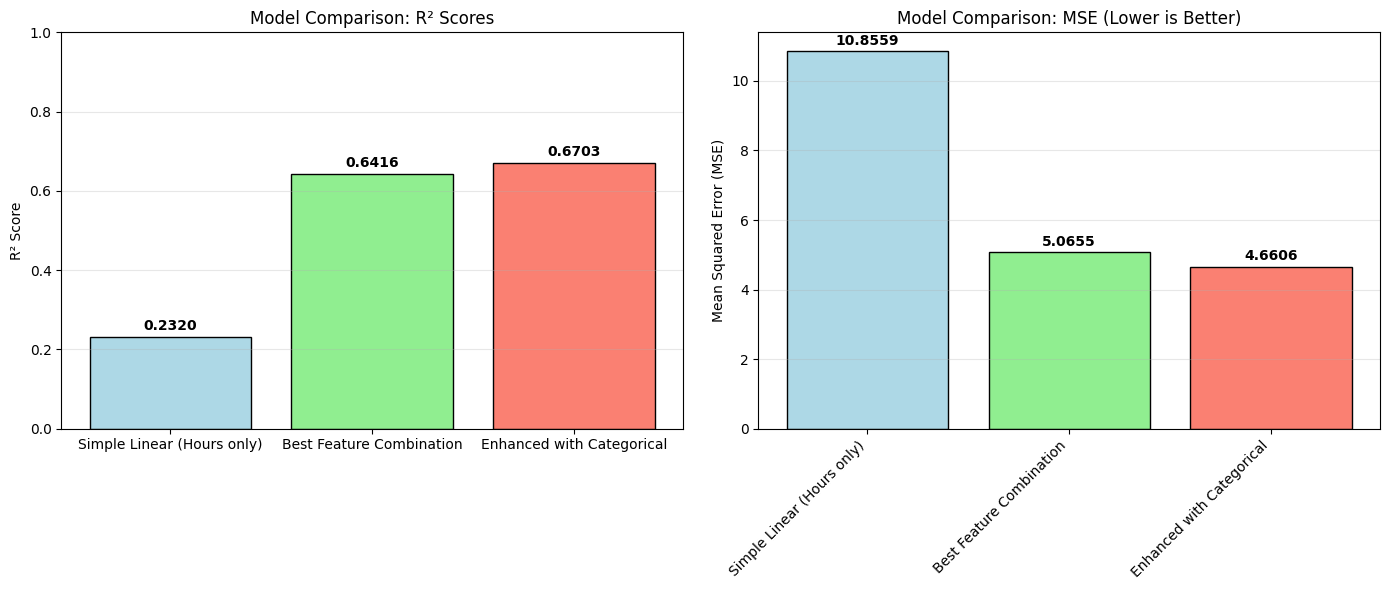


SUMMARY OF FINDINGS
1. Simple linear regression with only 'Hours_Studied' explains about 23.2% of the variance in exam scores.
2. Adding more features, particularly 'Previous_Scores', significantly improves prediction.
3. The best performing simple model uses: Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity
4. Polynomial regression didn't show significant improvement over linear for this dataset.
5. Including categorical features like 'Motivation_Level' provides additional predictive power.


In [ ]:
# ============================================================================
# FINAL COMPARISON VISUALIZATION
# ============================================================================

# Compare all models
models_summary = [
    ('Simple Linear (Hours only)', feature_results[0]['r2'], feature_results[0]['mse']),
    ('Best Feature Combination', best_result['r2'], best_result['mse']),
    ('Enhanced with Categorical', r2_enhanced, mse_enhanced)
]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# R² Comparison
model_names = [m[0] for m in models_summary]
r2_values = [m[1] for m in models_summary]

bars1 = ax1.bar(model_names, r2_values, color=['lightblue', 'lightgreen', 'salmon'], edgecolor='black')
ax1.set_ylabel('R² Score')
ax1.set_title('Model Comparison: R² Scores')
ax1.set_ylim([0, 1])
ax1.grid(True, alpha=0.3, axis='y')

for bar, r2 in zip(bars1, r2_values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.01,
             f'{r2:.4f}', ha='center', va='bottom', fontweight='bold')

# MSE Comparison (log scale for better visualization)
mse_values = [m[2] for m in models_summary]
bars2 = ax2.bar(model_names, mse_values, color=['lightblue', 'lightgreen', 'salmon'], edgecolor='black')
ax2.set_ylabel('Mean Squared Error (MSE)')
ax2.set_title('Model Comparison: MSE (Lower is Better)')
ax2.grid(True, alpha=0.3, axis='y')

for bar, mse in zip(bars2, mse_values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 0.1,
             f'{mse:.4f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("SUMMARY OF FINDINGS")
print("="*60)
print("1. Simple linear regression with only 'Hours_Studied' explains about",
      f"{feature_results[0]['r2']*100:.1f}% of the variance in exam scores.")
print("2. Adding more features, particularly 'Previous_Scores', significantly improves prediction.")
print("3. The best performing simple model uses:", ', '.join(best_result['features']))
print("4. Polynomial regression didn't show significant improvement over linear for this dataset.")
print("5. Including categorical features like 'Motivation_Level' provides additional predictive power.")